## Comparing RFR Predictions to ESPER NN and LIR (8cl, not normalized)

In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import mpl_scatter_density

from scipy.stats import gaussian_kde
from matplotlib.pyplot import figure

from sklearn.metrics import mean_squared_error

In [2]:
from matplotlib.font_manager import get_font_names

#print(get_font_names())

['Lucida Sans Unicode', 'Ink Free', 'Broadway', 'Tw Cen MT', 'Tahoma', 'Segoe UI Historic', 'Cooper Black', 'Liberation Serif', 'Segoe UI Symbol', 'Perpetua', 'KacstOffice', 'Frank Ruehl CLM', 'Niagara Engraved', 'Franklin Gothic Demi Cond', 'Times New Roman', 'Papyrus', 'Ravie', 'Monotype Corsiva', 'Verdana', 'Nirmala UI', 'cmtt10', 'Tw Cen MT Condensed Extra Bold', 'cmsy10', 'Microsoft New Tai Lue', 'SimSun', 'Lucida Console', 'Noto Naskh Arabic', 'Rage Italic', 'MS Reference Specialty', 'Centaur', 'Noto Sans Armenian', 'Liberation Sans', 'Lucida Sans Typewriter', 'Kunstler Script', 'Noto Serif Hebrew', 'STIXGeneral', 'OCR A Extended', 'Berlin Sans FB', 'Scheherazade', 'Segoe MDL2 Assets', 'Blackadder ITC', 'High Tower Text', 'Corbel', 'MV Boli', 'STIXSizeTwoSym', 'cmss10', 'Century Gothic', 'Gabriola', 'Chiller', 'Sitka', 'Noto Naskh Arabic UI', 'Noto Serif Lao', 'Lucida Fax', 'Harlow Solid Italic', 'Garamond', 'HoloLens MDL2 Assets', 'Reem Kufi', 'Noto Kufi Arabic', 'Century', 'Not

In [46]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [3]:
#import data sets 
ml = pd.read_csv("~/hollings/data/ta_editedcolord_pacific_withMATresults.csv")
rfr = pd.read_csv("~/hollings/data/rfrpreds2.csv")
rfr_diag = pd.read_csv("~/hollings/data/rfrpredsdiag.csv")

In [4]:
#setting up the esper df to get the order + nn1 +lir1 predictions
nn1 = ml.loc[:,"NN1"]
lir1 = ml.loc[:,"LIR1"]
order = ml.loc[:,"order"]

#esp1 = pd.concat([nn1, lir1], axis = 1).rename(columns={"2253.93995498303": "NN1", "2243.96443403836": "LIR1"})
#esp1["order"] = esp1.index

esp1 = pd.concat([order, nn1,lir1], axis = 1)

cols = esp1.columns.tolist()
#cols = cols[-1:] + cols[:-1]
esp1=esp1[cols]

In [4]:
esp1

,order,NN1,LIR1
0,0,2256.374458,2258.287768
1,1,2258.405685,2259.736263
2,2,2253.851330,2255.529003
3,3,2257.919259,2259.944260
4,4,2256.245299,2257.177118
...,...,...,...
179889,179889,2382.474171,2381.555804
179890,179890,2374.064113,2374.063018
179891,179891,2369.608704,2369.877598
179892,179892,2367.860650,2369.085062


### Full Covariance

In [5]:
all_esp = rfr.merge(esp1, how = "left", left_on = "Order_Num", right_on = "order")

In [42]:
all_esp["RFR_diff"] = all_esp["RFR1"] - all_esp["Y_test"]
all_esp["NN_diff"] = all_esp["NN1"] - all_esp["Y_test"]
all_esp["LIR_diff"] = all_esp["LIR1"] - all_esp["Y_test"]
all_esp["mixed"] = np.mean((all_esp["RFR1"], all_esp["NN1"], all_esp["LIR1"]), axis = 0)

In [43]:
all_esp

,Order_Num,RFR1,Y_test,Cluster,order,NN1,LIR1,RFR_diff,NN_diff,LIR_diff,mixed
0,115954.0,2286.791,2288.9,0,115954,2278.835761,2279.828523,-2.109,-10.064239,-9.071477,2281.818428
1,115956.0,2285.894,2289.1,0,115956,2286.434853,2286.145457,-3.206,-2.665147,-2.954543,2286.158103
2,115958.0,2322.525,2322.1,0,115958,2319.501163,2319.471912,0.425,-2.598837,-2.628088,2320.499358
3,115959.0,2328.542,2329.1,0,115959,2327.746715,2327.588561,-0.558,-1.353285,-1.511439,2327.959092
4,115962.0,2340.472,2341.8,0,115962,2339.606715,2340.570609,-1.328,-2.193285,-1.229391,2340.216441
...,...,...,...,...,...,...,...,...,...,...,...
47596,179838.0,2298.738,2294.2,7,179838,2299.549661,2300.251326,4.538,5.349661,6.051326,2299.512996
47597,179840.0,2356.531,2346.2,7,179840,2353.280853,2353.831731,10.331,7.080853,7.631731,2354.547861
47598,179845.0,2337.073,2336.0,7,179845,2335.090273,2336.132914,1.073,-0.909727,0.132914,2336.098729
47599,179852.0,2303.155,2311.7,7,179852,2302.460385,2303.922885,-8.545,-9.239615,-7.777115,2303.179423


In [53]:
#calculating all the RMSE
root_mean_squared_error(all_esp["Y_test"], all_esp["RFR1"]), root_mean_squared_error(all_esp["Y_test"], all_esp["NN1"]), root_mean_squared_error(all_esp["Y_test"], all_esp["LIR1"]), root_mean_squared_error(all_esp["Y_test"], all_esp["mixed"])

(4.764097396049917, 11.587995823493332, 5.6195161814320445, 6.254931013885829)

In [51]:
#RMSE and bias for clusters 1, 4, 5
#Cluster 1
all1 = all_esp[all_esp["Cluster"] ==1]

print(root_mean_squared_error(all1 ["Y_test"], all1 ["NN1"]))
print(np.mean(all1["NN_diff"]))

print(root_mean_squared_error(all1["Y_test"], all1 ["LIR1"]))
print(np.mean(all1["LIR_diff"]))

90.2261067470833
10.350222897515527
25.09485383409656
0.8480661242236004


In [52]:
#RMSE and bias for clusters 1, 4, 5
#Cluster 4
all4 = all_esp[all_esp["Cluster"] ==4]

print(root_mean_squared_error(all4 ["Y_test"], all4 ["NN1"]))
print(np.mean(all4["NN_diff"]))

print(root_mean_squared_error(all4["Y_test"], all4 ["LIR1"]))
print(np.mean(all4["LIR_diff"]))

8.935552464169929
-0.9341487414676718
9.349454155074696
-1.5898591187983913


In [53]:
#RMSE and bias for clusters 1, 4, 5
#Cluster 5
all5 = all_esp[all_esp["Cluster"] ==5]

print(root_mean_squared_error(all5["Y_test"], all5["NN1"]))
print(np.mean(all5["NN_diff"]))

print(root_mean_squared_error(all5["Y_test"], all5["LIR1"]))
print(np.mean(all5["LIR_diff"]))

6.578621339706885
-0.3840859918723336
6.313114930701343
-0.1449295597071723


In [59]:
#calc bias
np.mean(all_esp["RFR_diff"]), np.mean(all_esp["NN_diff"]), np.mean(all_esp["LIR_diff"]), np.mean(all_esp["mixed"] - all_esp["Y_test"]),  

(0.04675493780234794,
 0.226026093936348,
 0.06049941359349728,
 0.11109348177739706)

In [8]:
all_esp[all_esp.NN_diff >= 1217]

,Order_Num,RFR1,Y_test,Cluster,order,NN1,LIR1,RFR_diff,NN_diff,LIR_diff
5275,104290.0,1016.567,885.53,1,104290,2102.920313,1095.006701,131.037,1217.390313,209.476701


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

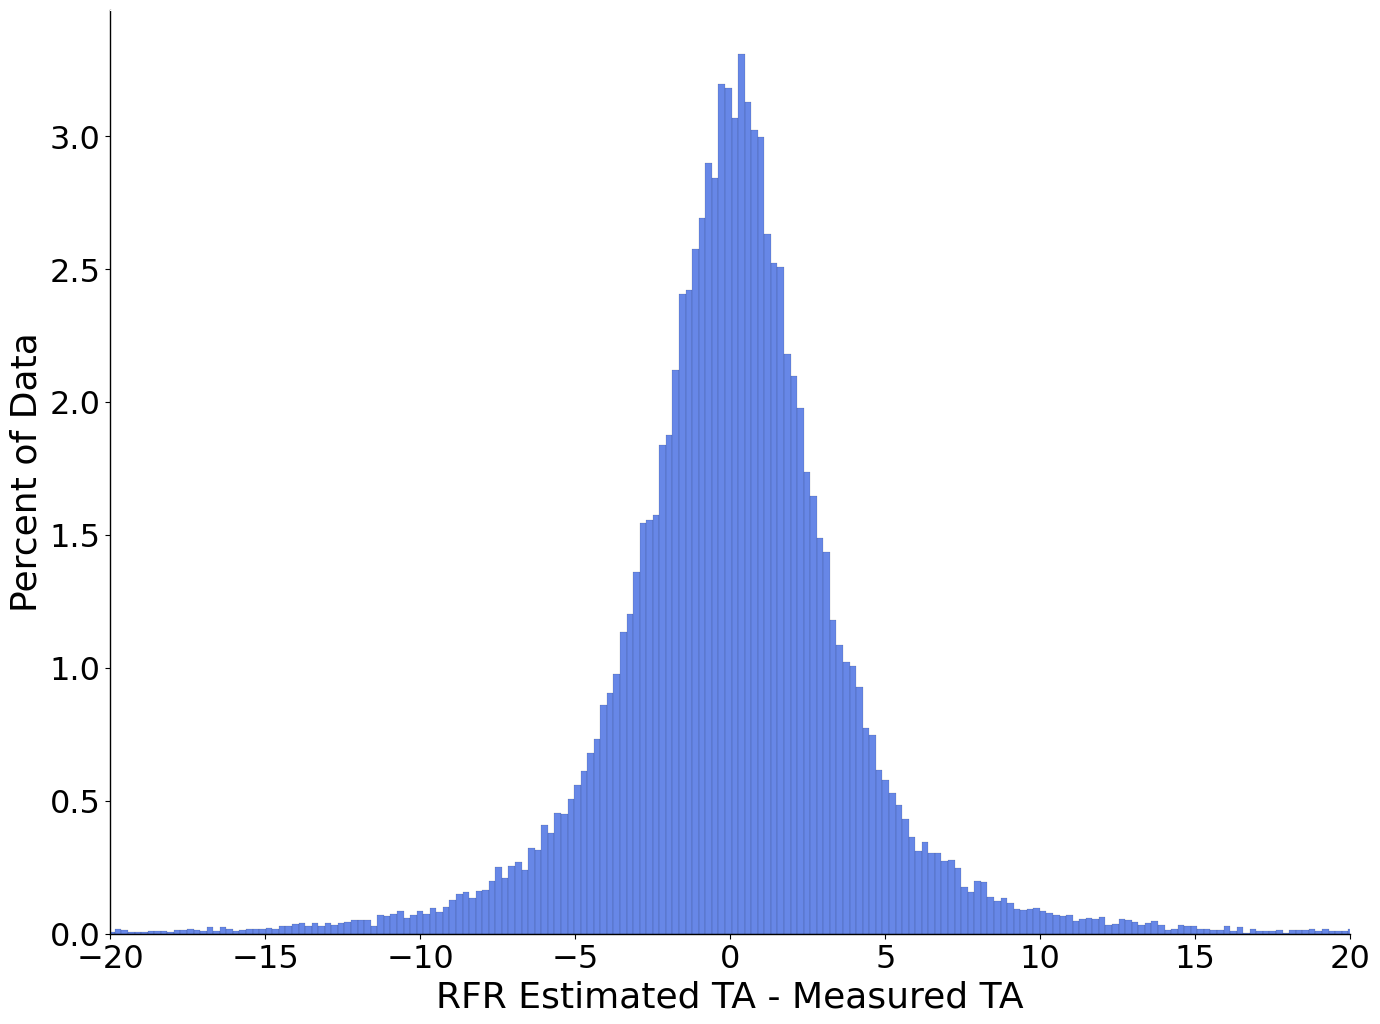

In [76]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.histplot(all_esp["RFR_diff"], stat = "percent", color = "royalblue", alpha = 0.8)
#sns.histplot(all_esp["NN_diff"], stat = "percent", color = "red", alpha = 0.3)
#sns.histplot(all_esp["LIR_diff"], stat = "percent", color = "green", alpha = 0.5)
#plt.axvline(0)
ax.set_xlim(-20,20)
ax.set_xlabel("RFR Estimated TA - Measured TA", fontsize = 26)
ax.set_ylabel("Percent of Data", fontsize = 26)

ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

plt.xticks(fontsize=23)
plt.yticks(fontsize=23)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

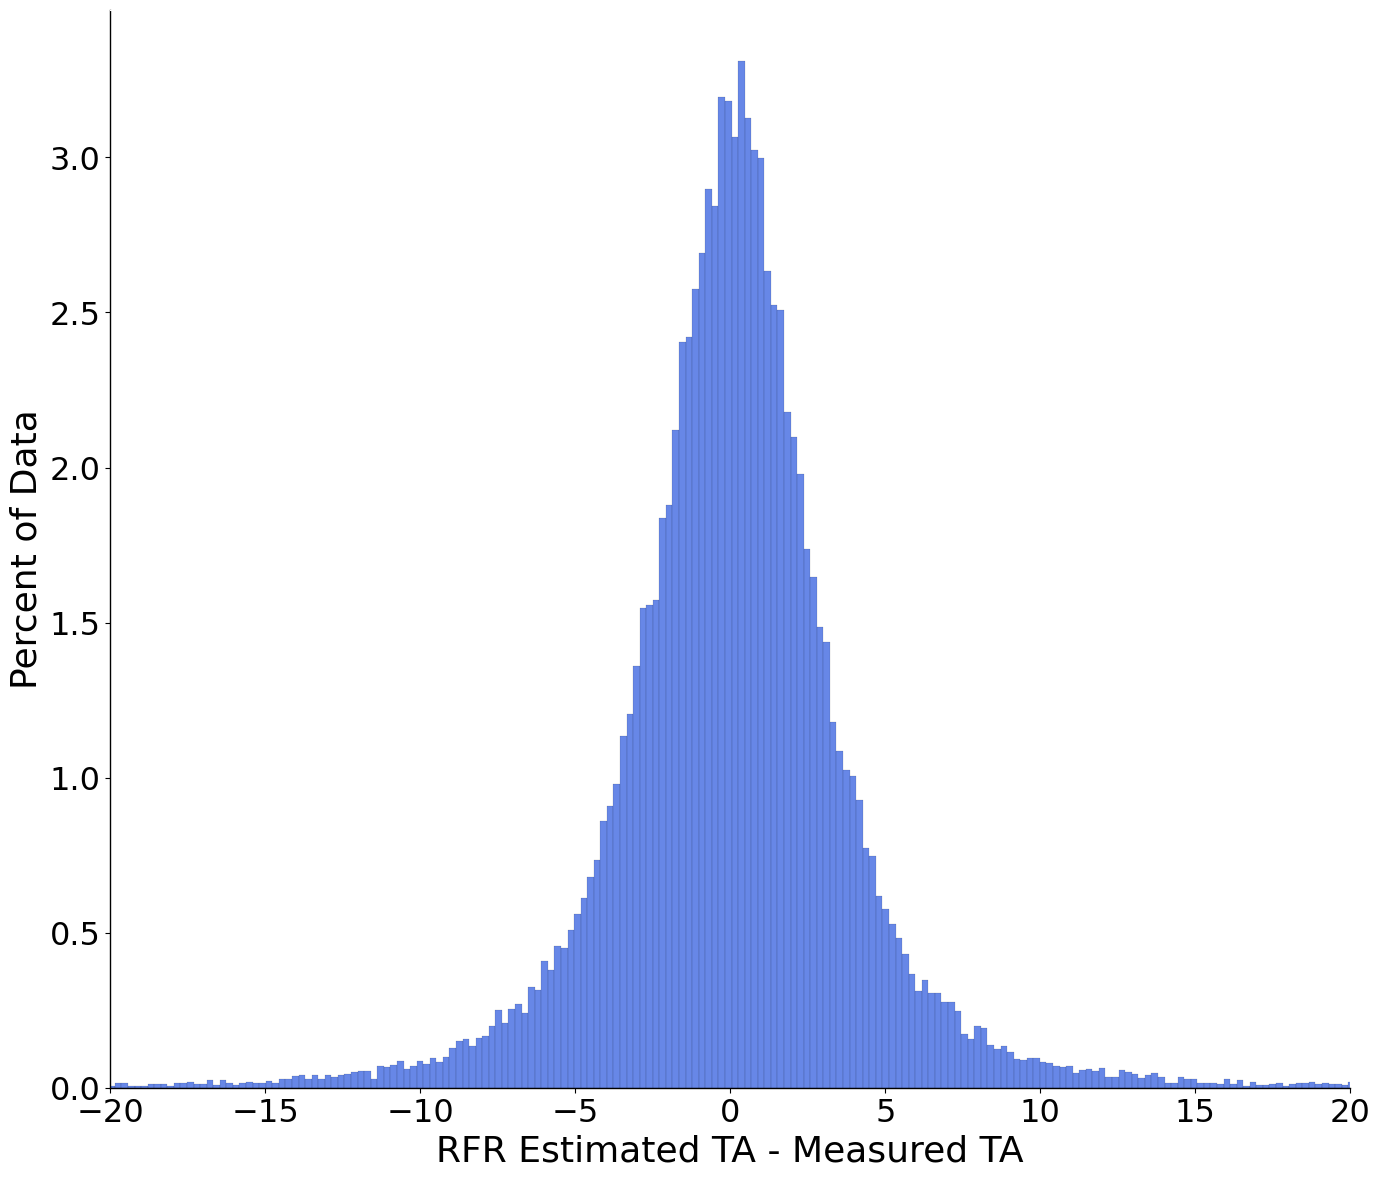

In [84]:
fig, ax = plt.subplots(figsize=(16, 14))
sns.histplot(all_esp["RFR_diff"], stat = "percent", color = "royalblue", alpha = 0.8)
#sns.histplot(all_esp["NN_diff"], stat = "percent", color = "red", alpha = 0.3)
#sns.histplot(all_esp["LIR_diff"], stat = "percent", color = "green", alpha = 0.5)
#plt.axvline(0)
ax.set_xlim(-20,20)
ax.set_xlabel("RFR Estimated TA - Measured TA", fontsize = 26)
ax.set_ylabel("Percent of Data", fontsize = 26)

ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

plt.xticks(fontsize=23)
plt.yticks(fontsize=23)

(-20.0, 20.0)

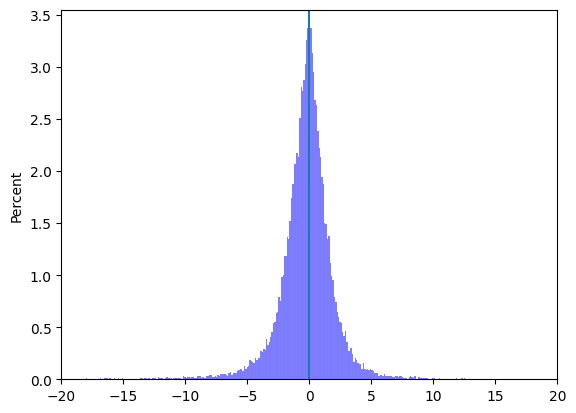

In [34]:
fig, ax = plt.subplots()

sns.histplot(np.abs(all_esp["RFR_diff"]) - np.abs(all_esp["NN_diff"]), stat = "percent", color = "blue", alpha = 0.5)
#sns.histplot(all_esp["NN_diff"], stat = "percent", color = "red", alpha = 0.3)
#sns.histplot(all_esp["LIR_diff"], stat = "percent", color = "green", alpha = 0.1)
plt.axvline(0)
ax.set_xlim(-20,20)

(-20.0, 20.0)

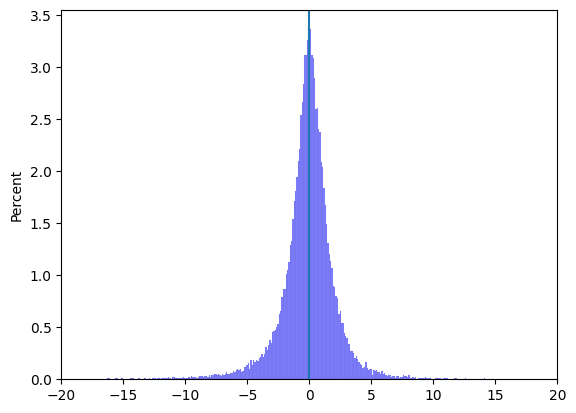

In [35]:
fig, ax = plt.subplots()

sns.histplot(np.abs(all_esp["RFR_diff"]) - np.abs(all_esp["LIR_diff"]), stat = "percent", color = "blue", alpha = 0.5)
#sns.histplot(all_esp["NN_diff"], stat = "percent", color = "red", alpha = 0.3)
#sns.histplot(all_esp["LIR_diff"], stat = "percent", color = "green", alpha = 0.1)
plt.axvline(0)
ax.set_xlim(-20,20)

<Axes: xlabel='RFR_diff', ylabel='Percent'>

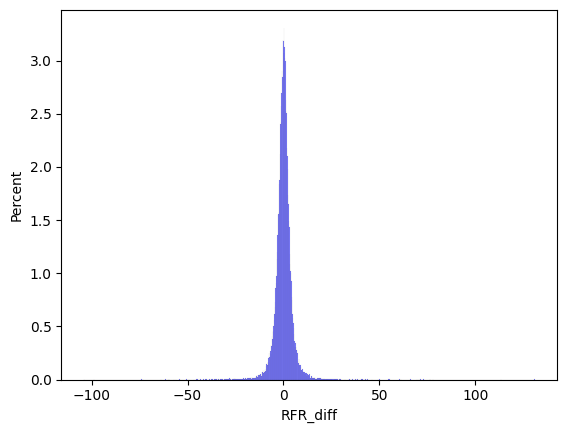

In [31]:
sns.histplot(all_esp["RFR_diff"], stat = "percent", color = "blue", alpha = 0.5) 

<Axes: xlabel='RFR_diff'>

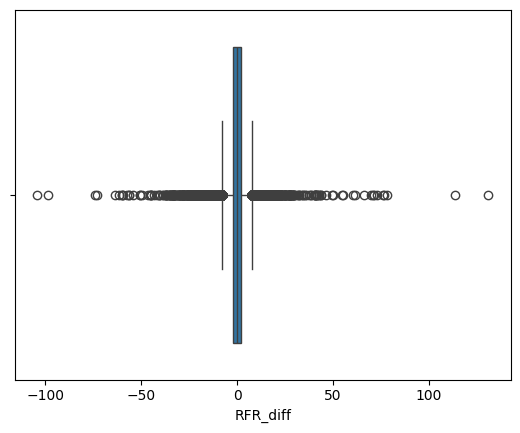

In [30]:
#making a boxplot
fig, ax = plt.subplots()
sns.boxplot(x = all_esp["RFR_diff"])
#sns.boxplot(x = all_esp["NN_diff"])
#sns.boxplot(x = all_esp["LIR_diff"])
#ax.set_xlim(-50,50)

In [11]:
all_esp["LIR_diff"].describe()

count    47601.000000
mean         0.060499
std          5.619250
min       -131.014107
25%         -1.769589
50%          0.137755
75%          2.071662
max        209.476701
Name: LIR_diff, dtype: float64

In [12]:
all_esp["NN_diff"].describe()

count    47601.000000
mean         0.226026
std         11.585913
min       -107.397788
25%         -1.901199
50%          0.218583
75%          2.281309
max       1217.390313
Name: NN_diff, dtype: float64

In [13]:
all_esp["RFR_diff"].describe()

count    47601.000000
mean         0.046755
std          4.763918
min       -104.079800
25%         -1.839000
50%          0.104000
75%          1.996000
max        131.037000
Name: RFR_diff, dtype: float64

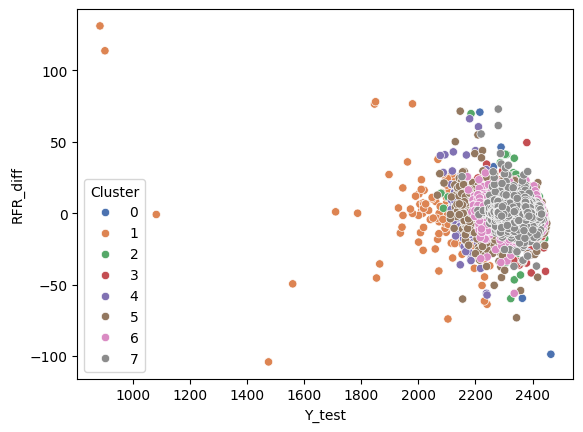

In [14]:
# graph of dta and actual for this rfr model 
full_diff = sns.scatterplot(data = all_esp, x= "Y_test", y="RFR_diff", hue = "Cluster", palette = "deep")
#full_diff.label(x="Measured TA", y = "RFR Predictions - Measured TA")

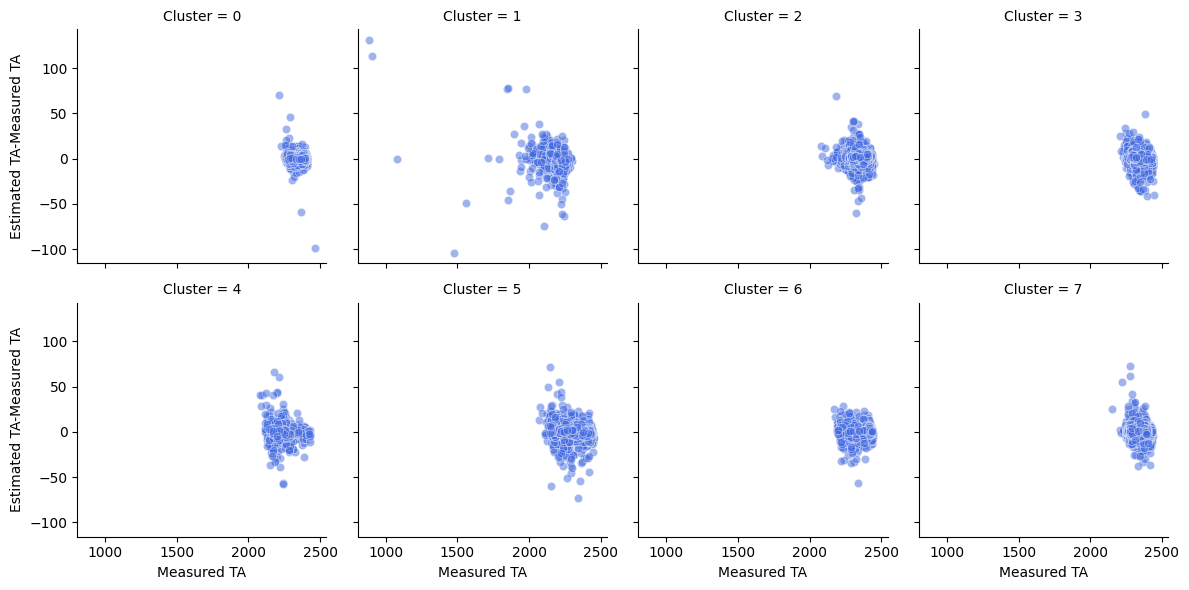

In [23]:
full_fct = sns.FacetGrid(all_esp, col = "Cluster", col_wrap = 4)
full_fct.map(sns.scatterplot, "Y_test", "RFR_diff",alpha=0.5, color = "royalblue", edgecolor = "w")
full_fct.set(xlabel = "Measured TA", ylabel = "Estimated TA-Measured TA")
plt.savefig('sepcl8.png', dpi = 400)

In [ ]:
fig, ax = plt.subplots()
plt.rc('font', family='serif')
plt.grid(True, linestyle=':')

scatter = plt.scatter(x1, y1, c=z1, s=1, cmap = "viridis")

ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

ax.spines['right'].set_color("white")
ax.spines['top'].set_color("white")

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Density')

full_fct = sns.FacetGrid(all_esp, col = "Cluster", col_wrap = 4, sharex=True, sharey=True)
full_fct.map(sns.scatterplot, "Y_test", "RFR_diff", alpha=0.6)
full_fct.set(xlabel = "Measured TA", ylabel = "Estimated TA-Measured TA")

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.3, wspace=0.3)


#plt.colorbar(scatter, ax = ax)
plt.show()

In [26]:
cludt = {}
for i in range(8):
    tst = all_esp[all_esp["Cluster"] == i] 
    cludt[i] = tst

cludt

{0:       Order_Num         RFR1  Y_test  Cluster   order          NN1  \
 0      115954.0  2286.791000  2288.9        0  115954  2278.835761   
 1      115956.0  2285.894000  2289.1        0  115956  2286.434853   
 2      115958.0  2322.525000  2322.1        0  115958  2319.501163   
 3      115959.0  2328.542000  2329.1        0  115959  2327.746715   
 4      115962.0  2340.472000  2341.8        0  115962  2339.606715   
 ...         ...          ...     ...      ...     ...          ...   
 5077   177928.0  2305.379000  2304.2        0  177928  2307.694707   
 5078   177933.0  2293.309275  2292.2        0  177933  2294.347206   
 5079   177948.0  2330.113000  2330.5        0  177948  2332.025461   
 5080   177950.0  2350.589000  2350.8        0  177950  2350.117313   
 5081   177952.0  2365.853084  2366.5        0  177952  2364.526686   
 
              LIR1  RFR_diff    NN_diff  LIR_diff  
 0     2279.828523 -2.109000 -10.064239 -9.071477  
 1     2286.145457 -3.206000  -2.665147

In [ ]:
#!pip install scikit-misc
#from scikit_misc import scatter_density

x = cludt[1]["Y_test"]
y = cludt[1]["RFR_diff"]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(x, y, cmap="viridis", 
                             vmin=0.5, vmax=np.nanmax,
                             dpi=150, downres_factor=2)
cb = fig.colorbar(density, label='Number of points per pixel')

In [ ]:
for i in cludt.keys():
    x = cludt[i]["Y_test"]
    y = cludt[i]["RFR_diff"]

    fig, ax = plt.subplots()
    hb = ax.hexbin(x, y, gridsize=70, cmap="viridis", mincnt=1)
    cb = fig.colorbar(hb, ax=ax, label='Number of points per hexagon')

    ax.set_xlabel("Measured TA")
    ax.set_ylabel("Estimated TA - Measured TA")
    ax.set_title(f'Cluster {i}')

    plt.tight_layout()
    plt.show()

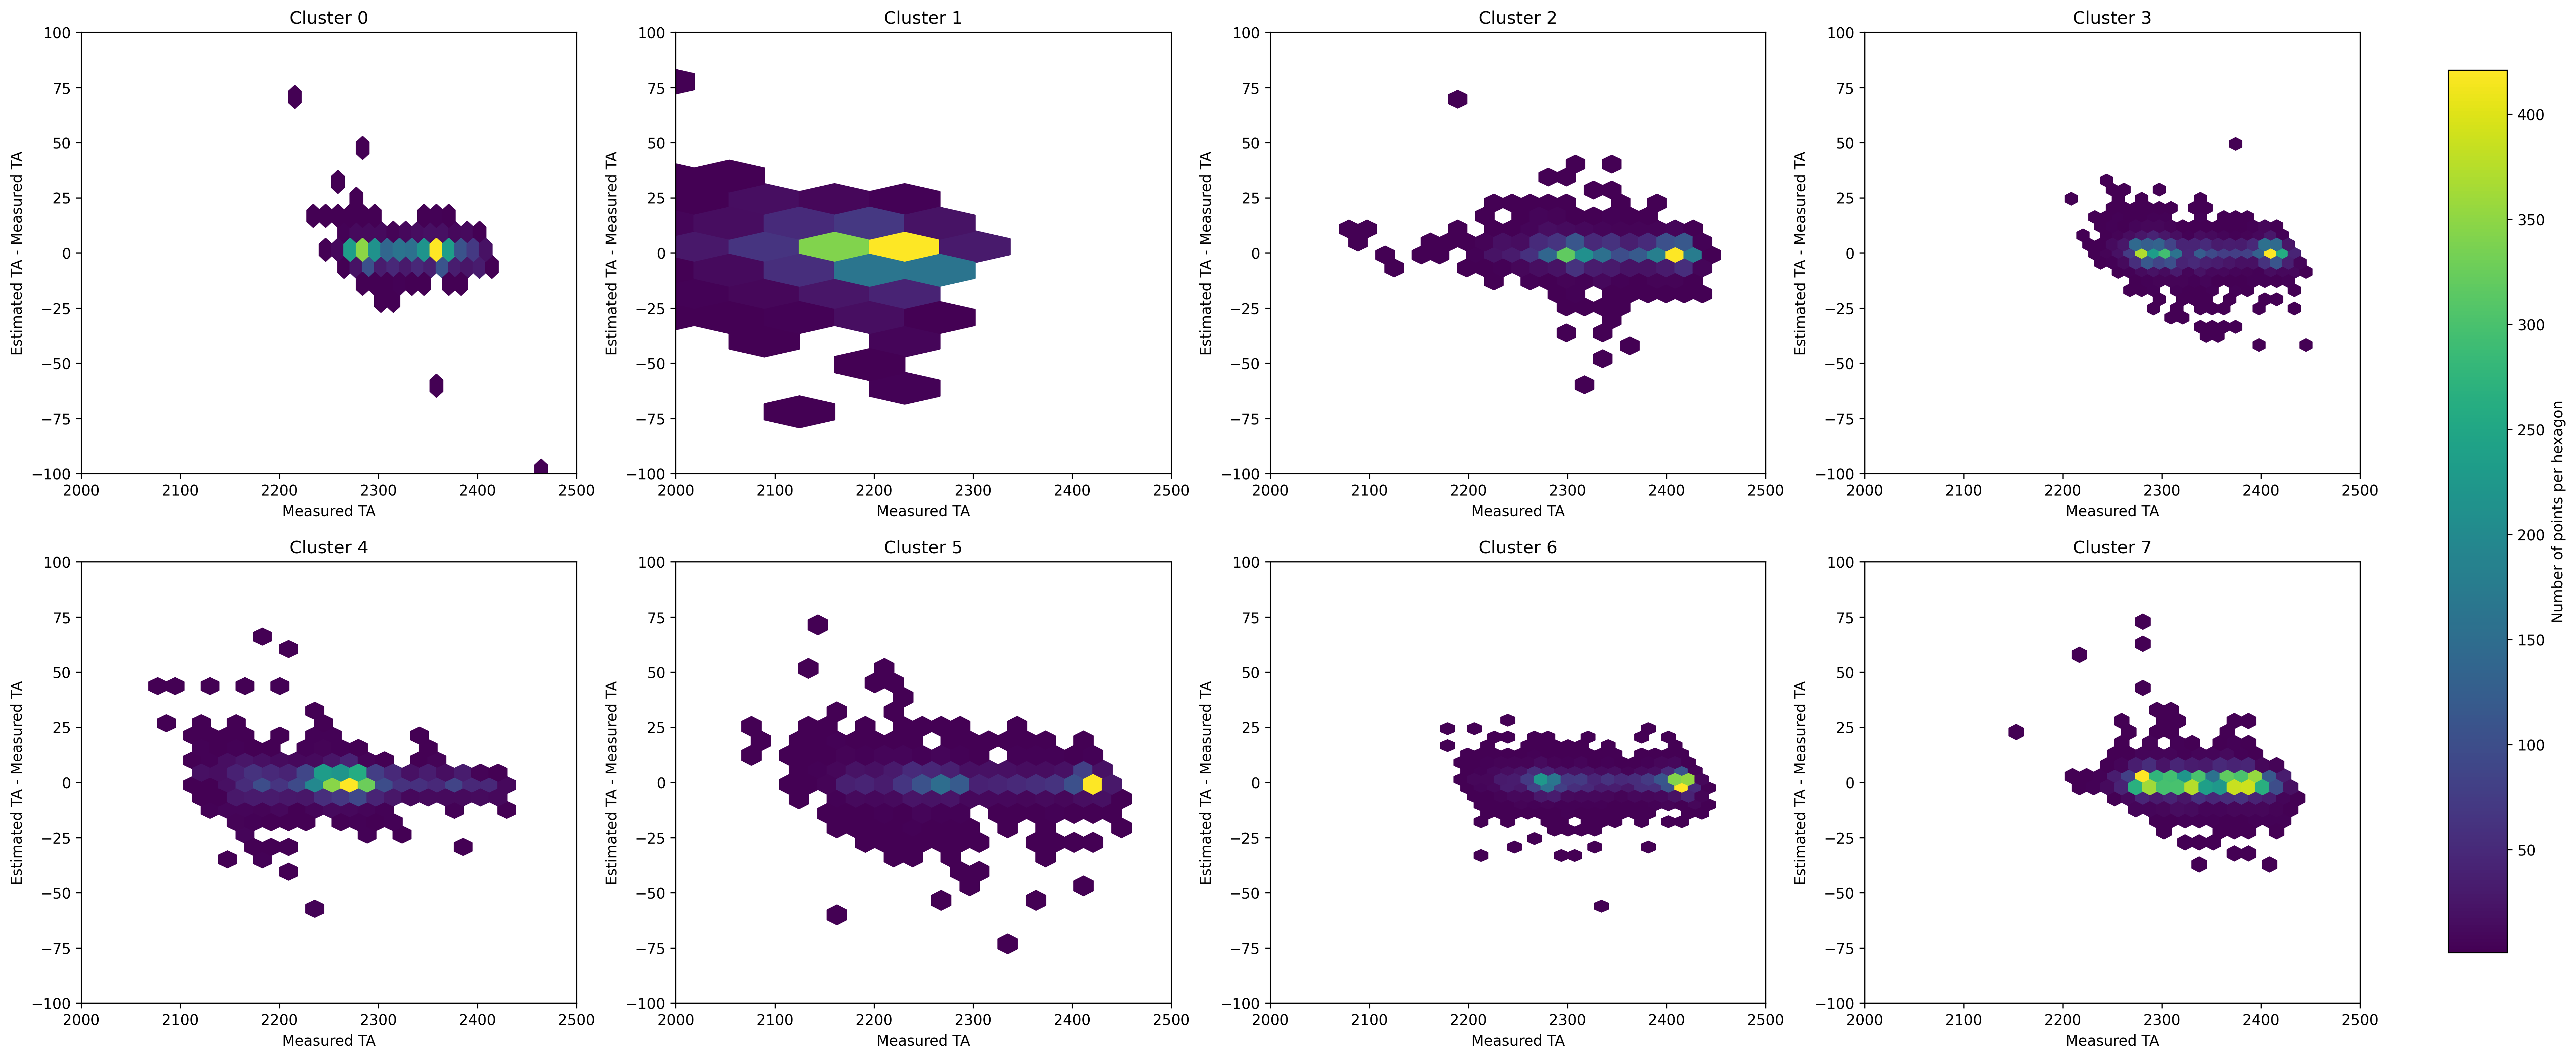

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
clusters = list(cludt.keys())
n_clusters = len(clusters)
n_cols = 4  # Number of columns in the grid (you can adjust this)
n_rows = np.ceil(n_clusters / n_cols).astype(int)  # Number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(28, 12), dpi=300)
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, ax in enumerate(axes):
    if i < n_clusters:
        x = cludt[clusters[i]]["Y_test"]
        y = cludt[clusters[i]]["RFR_diff"]

        hb = ax.hexbin(x, y, gridsize=20, cmap="viridis", mincnt=1)

        ax.set_xlabel("Measured TA")
        ax.set_ylabel("Estimated TA - Measured TA")
        ax.set_title(f'Cluster {clusters[i]}')

        ax.set_ylim(-100,100)
        ax.set_xlim(2000,2500)
    else:
        ax.axis('off')  # Turn off empty subplots

cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.set_label('Number of points per hexagon')

plt.savefig('all_clusters_hexbin.png', dpi=300)  # Save the entire grid of plots
plt.show()


In [ ]:
ffctlst = list(full_fct.facet_data())
fdf = pd.DataFrame()
for idx in range(len(ffctlst)):
    col_sum = ffctlst[idx][1].iloc[:,7].describe()
    fdf = pd.concat([fdf, col_sum], axis = 1)
fdf.columns = ["FuCluster 1", "FuCluster 2", "FuCluster 3", "FuCluster 4", "FuCluster 5", "FuCluster 6", "FuCluster 7", "FuCluster 8"]

<Axes: xlabel='Y_test', ylabel='RFR1'>

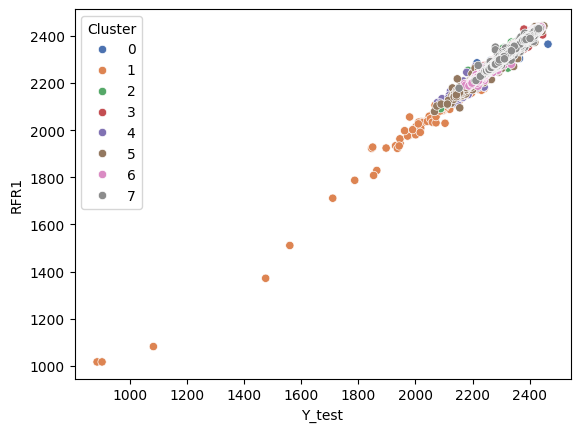

In [42]:
#plotting Ymeasured v Yestimated 
sns.scatterplot(data = all_esp, x= "Y_test", y="RFR1", hue = "Cluster", palette = "deep")

In [18]:
#get r2 value of graph
rsr = r2_score(all_esp.Y_test, all_esp.RFR1)
rsn = r2_score(all_esp.Y_test, all_esp.NN1)
rsl = r2_score(all_esp.Y_test, all_esp.LIR1)
rsr, rsn, rsl

(0.9946883070849575, 0.9685740542685779, 0.992609572713147)

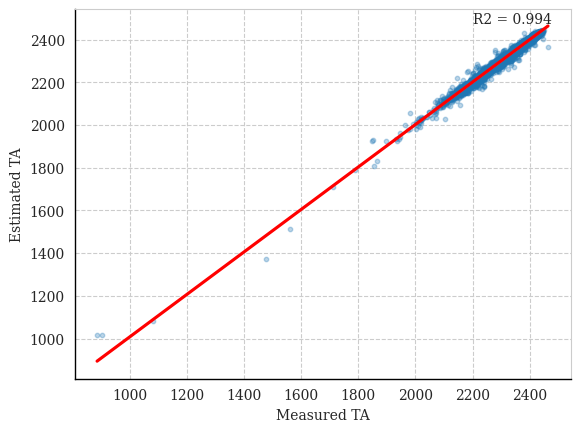

In [25]:
plt.rc('font', family='serif')
plt.grid(True, linestyle='--')


ax = sns.regplot(data = all_esp, x= "Y_test", y="RFR1", line_kws={'color':'red'}, scatter_kws={'alpha':0.3, "s":10})
ax.set(xlabel = "Measured TA", ylabel = "Estimated TA")
ax.text(2200,2475, "R2 = 0.994")
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

#plt.savefig('estmeas1.png')

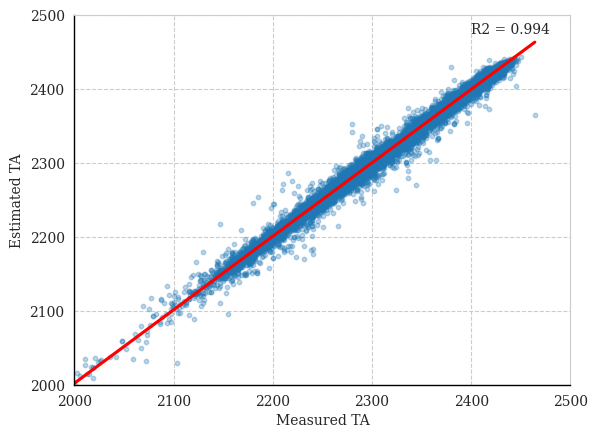

In [26]:
#plt.rcParams['axes.linewidth'] = 0.5
#sns.set_style("whitegrid", {'grid.linestyle': ':'})

plt.rc('font', family='serif')
plt.grid(True, linestyle='--')

ax = sns.regplot(data = all_esp, x= "Y_test", y="RFR1", line_kws={'color':'red'}, scatter_kws={'alpha':0.3, "s":10})
#sns.regplot(data = all_esp, x= "Y_test", y="NN1", line_kws={'color':'green'}, scatter_kws={'alpha':0.3, "s":10})
#sns.regplot(data = all_esp, x= "Y_test", y="LIR1", line_kws={'color':'pink'}, scatter_kws={'alpha':0.3, "s":10})
ax.set(xlabel = "Measured TA", ylabel = "Estimated TA")
ax.set_xlim(2000,2500)
ax.set_ylim(2000,2500)
ax.text(2400,2475, "R2 = 0.994")

ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

#plt.savefig('estmeas1.png')

### Density of Points

#### Using Gaussian KDE methods

In [13]:
from scipy.stats import gaussian_kde
from matplotlib.pyplot import figure

In [7]:
x = all_esp["Y_test"]
y = all_esp["RFR1"]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

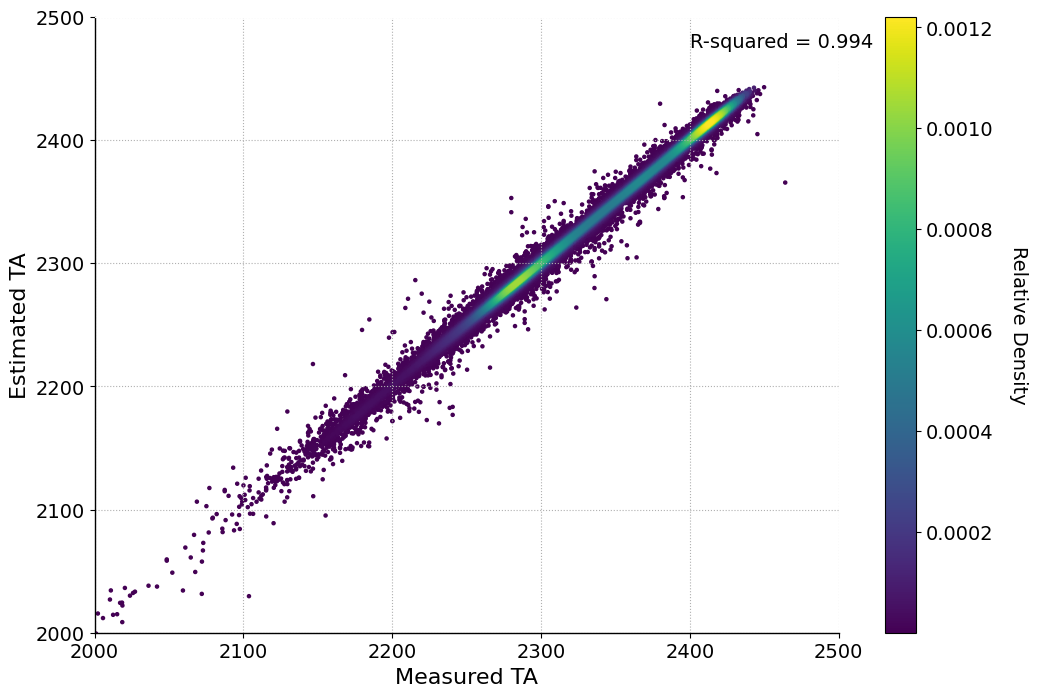

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(True, linestyle=':')
#scatter = ax.scatter(x, y, c=z, s=1, alpha=0.3, cmap='viridis')
plt.scatter(x, y, c=z, s=5, cmap = "viridis")
ax.set_xlabel("Measured TA", fontsize = 16)
ax.set_ylabel("Estimated TA", fontsize = 16)
ax.set_xlim(2000,2500)
ax.set_ylim(2000,2500)
ax.text(2400,2475, "R-squared = 0.994", fontsize = 14)

ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

ax.spines['right'].set_color("white")
ax.spines['top'].set_color("white")

cbar = plt.colorbar()
cbar.set_label('Relative Density', rotation = 270, labelpad =25, fontsize = 14)
cbar.ax.tick_params(labelsize=14) 

ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig("densestmeas2.png",dpi = 400)   

#### Using MPL Scatter Density

### Diagonal Covariance

In [44]:
diag_esp = rfr_diag.merge(esp1, how = "left", left_on = "Order_Num", right_on = "order")

In [ ]:
diag_esp["RFR_diff"] = diag_esp["RFR1"] - diag_esp["Y_test"]
diag_esp["NN_diff"] = diag_esp["NN1"] - diag_esp["Y_test"]
diag_esp["LIR_diff"] = diag_esp["LIR1"] - diag_esp["Y_test"]

In [ ]:
sns.histplot(diag_esp["RFR_diff"], stat = "percent")

In [ ]:
diag_diff = sns.scatterplot(data = diag_esp, x= "Y_test", y="RFR_diff", hue = "Cluster", palette = "deep")

In [ ]:
diag_fct = sns.FacetGrid(diag_esp, col = "Cluster", col_wrap = 4)
diag_fct.map(sns.scatterplot, "Y_test", "RFR_diff")

In [ ]:
dfctlst = list(diag_fct.facet_data())
dfctlst[0][1].iloc[:,7].describe()

In [ ]:
dfctlst = list(diag_fct.facet_data())
didf = pd.DataFrame()
for idx in range(len(dfctlst)):
    col_sum = dfctlst[idx][1].iloc[:,7].describe()
    didf = pd.concat([didf, col_sum], axis = 1)
didf.columns = ["DiCluster 1", "DiCluster 2", "DiCluster 3", "DiCluster 4", "DiCluster 5", "DiCluster 6", "DiCluster 7", "DiCluster 8"]

In [ ]:
#plotting Ymeasured v Yestimated 
sns.scatterplot(data = diag_esp, x= "Y_test", y="RFR1", hue = "Cluster", palette = "deep")

In [ ]:
sns.regplot(data = diag_esp, x= "Y_test", y="RFR1", line_kws={'color':'red'}, scatter_kws={'alpha':0.3, "s":10})

### Comparing Stats for Diagonal and Full Cov

In [ ]:
print("Full Cov")
print(all_esp["RFR_diff"].describe())
print("Diag Cov")
print(diag_esp["RFR_diff"].describe())

In [ ]:
fdf

In [ ]:
didf